In [31]:
                             #Spam Message Detector Model


                                   MOTIVATION
Email has ended up being one of the most important means of communication. As of 2014, there are an estimated 4.1 billion email accounts worldwide, and nearly 196 billion emails are sent worldwide each day. Spam is one of the main threats to email clients. Connecting to spam emails can lead clients to websites with malware or phishing schemes that can enter and compromise the recipient's computer framework. Additionally, these destinations may collect sensitive data. Additionally, spam costs businesses around $2,000 per year due to reduced productivity. Effective innovation in spam filtering could subsequently represent a significant commitment to support the Internet and our society. Currently, there are various approaches to spam detection. These approaches include boycotting, bulk email detection, message header filtering, greylisting, and content-based filtering, Blacklisting could be a method that recognizes an IP address. In addition, Artificial Intelligence can recognize when spam is linked to the danger of malware. Not all spam emails are traps, so malware is likely to end up in your inbox eventually. AI spam channels check every incoming message and name any scary substance.

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

                                    DATASET
Spam detection can be a problem focused on machine learning. This means that you need to demonstrate your machine learning using a set of spam message cases and have them discover the significant propositions that separated these two distinct categories. Most mail providers have huge data sets of labeled emails available. Every time you mark an email as spam in your Gmail account, you're giving Google ready information for its machine learning calculations.
 
There are several open source datasets. However, these datasets are intended for instructional and testing purposes and are not very useful for building machine learning models at the production level. For this purpose, the collected information is obtained from CSV that can be used to prepare machine learning models. The information was initially available in an English and was obtained within a comma-separated value (CSV) format. In At the end of this preparation, we collected a total e-mails, recorded in two columns. The primary column, named "text", which has two conceivable values such as spam , was to be used to classify emails. 
 
         





Removing rows with NULL values in text column
 
                     

Import Data
The primary layout is to mock a dataset that is downloaded from “Kaggle” and then converted to a CSV layout in English A dataset containing 2044 emails has now been classified as spam. The information was obtained while composing within the English Language. 
Data Preprocessing
In machine learning (ML), preprocessing express refers to the organization and inspection of raw information that has recently been used to prepare and test characteristic learning models. In short, preprocessing could be an ML information mining approach that turns raw information into a usable and inventive structure. An exceptional start step in ML development is preprocessing, in which real-world information, usually incomplete, loose, and incorrect due to defects and insufficient, is transformed into accurate, precise, and usable input factors and patterns.



In [13]:
data = pd.read_csv('emails_V2.csv')
data

,text,spam
0,Subject: naturally irresistible your corporate...,1.0
1,Subject: the stock trading gunslinger fanny i...,1.0
2,Subject: unbelievable new homes made easy im ...,1.0
3,Subject: 4 color printing special request add...,1.0
4,"Subject: do not have money , get software cds ...",1.0
...,...,...
5721,NaN,NaN
5722,NaN,NaN
5723,NaN,NaN
5724,NaN,NaN


In [14]:
data.isnull().sum()

text    3683
spam    3683
dtype: int64

In [15]:
                         #Removing rows with NULL values in text column

In [16]:
data = data.dropna(subset = ['text'])
data.isnull().sum()

text    0
spam    0
dtype: int64

In [17]:
      # Hence data's NULL values are now cleaned, moreover I thought there would be a scenario where some of the rows would have only the spam column as NULL, and I would consider them as a test data set.

In [18]:
data

,text,spam
0,Subject: naturally irresistible your corporate...,1.0
1,Subject: the stock trading gunslinger fanny i...,1.0
2,Subject: unbelievable new homes made easy im ...,1.0
3,Subject: 4 color printing special request add...,1.0
4,"Subject: do not have money , get software cds ...",1.0
...,...,...
2038,Subject: the installation of the equipment you...,0.0
2039,Subject: all about current and near future gas...,0.0
2040,Subject: maureen ' s expenses it appears that...,0.0
2041,Subject: interview - numerical methods & finan...,0.0


In [19]:
data.iloc[1024]

text    Subject: localized software , all languages av...
spam                                                  1.0
Name: 1024, dtype: object

In [20]:
data['text'][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [21]:
data['text'] = data['text'].str.lstrip('Subject:')

C:\Users\h\AppData\Local\Temp/ipykernel_7820/4265405623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].str.lstrip('Subject:')


In [22]:
data

,text,spam
0,naturally irresistible your corporate identit...,1.0
1,the stock trading gunslinger fanny is merril...,1.0
2,unbelievable new homes made easy im wanting ...,1.0
3,4 color printing special request additional ...,1.0
4,"do not have money , get software cds from her...",1.0
...,...,...
2038,the installation of the equipment you ordered...,0.0
2039,all about current and near future gas / power...,0.0
2040,maureen ' s expenses it appears that adminis...,0.0
2041,interview - numerical methods & finance dear...,0.0


In [23]:
data['spam'].dtype

dtype('float64')

In [24]:
              #Converting spam column to int datatype

In [25]:
data['spam'] = data['spam'].astype(int)
data['spam'].dtype

C:\Users\h\AppData\Local\Temp/ipykernel_7820/687636052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['spam'] = data['spam'].astype(int)


dtype('int32')

In [26]:
data

,text,spam
0,naturally irresistible your corporate identit...,1
1,the stock trading gunslinger fanny is merril...,1
2,unbelievable new homes made easy im wanting ...,1
3,4 color printing special request additional ...,1
4,"do not have money , get software cds from her...",1
...,...,...
2038,the installation of the equipment you ordered...,0
2039,all about current and near future gas / power...,0
2040,maureen ' s expenses it appears that adminis...,0
2041,interview - numerical methods & finance dear...,0


In [27]:
          #Let's visualise the data

<AxesSubplot:xlabel='spam', ylabel='count'>

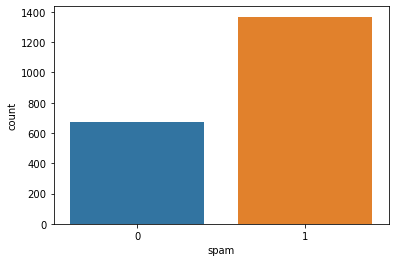

In [28]:
sns.countplot(x = 'spam', data = data)

In [29]:
       #Converting textual data to numeric data

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [31]:
for i in range(len(data['text'])):
    data['text'][i] = re.sub(r"[^a-zA-Z0-9]", ' ', data['text'][i])

C:\Users\h\AppData\Local\Temp/ipykernel_7820/3881389072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'][i] = re.sub(r"[^a-zA-Z0-9]", ' ', data['text'][i])


In [32]:
data['text'] = data['text'].str.lower()

C:\Users\h\AppData\Local\Temp/ipykernel_7820/369403302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].str.lower()


In [33]:
data

,text,spam
0,naturally irresistible your corporate identit...,1
1,the stock trading gunslinger fanny is merril...,1
2,unbelievable new homes made easy im wanting ...,1
3,4 color printing special request additional ...,1
4,do not have money get software cds from her...,1
...,...,...
2038,the installation of the equipment you ordered...,0
2039,all about current and near future gas power...,0
2040,maureen s expenses it appears that adminis...,0
2041,interview numerical methods finance dear...,0


In [34]:
corpus = data['text'].values

In [35]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(corpus)

In [36]:
x

<2043x24693 sparse matrix of type '<class 'numpy.float64'>'
	with 236745 stored elements in Compressed Sparse Row format>

In [37]:
y = data['spam']
y

0       1
1       1
2       1
3       1
4       1
       ..
2038    0
2039    0
2040    0
2041    0
2042    0
Name: spam, Length: 2043, dtype: int32

In [38]:
      #Training the model

                                      METHOD
Currently, when we have the train test split, we would have to select the model. There is a huge collection of models, but for this particular task we will use logisticregression. Why? In general, when someone asks what Logisticregression? what do you say to them . it is an algorithm used to categorize things into two classes (mostly), i.e. the outcome is measured using a dichotomous variable. But how computed regression classifies a thing into classes like -binomial (2 possible values), multinomial (3 or more possible values) and ordinal (deals with ordered categories). i.e. the result of the show will be divided into two classes.
We flagged the messages for a spam detection issue, but we're not sure how many unused incoming messages there are. We will require a show that can tell us the probability that the message is spam or not spam. 0 Acceptance in this case shows — a negative class (no appearance of spam) and 1 shows — a positive class (close to spam), We will use the logistic regression model.


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts

In [40]:
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.3, random_state = 42)

In [41]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

                                    Results
First we define the model then fit the train data. This phase is called training your model. Once the training phase is complete, we are able to use the testing part and predict what will happen. In order to verify the accuracy of our demonstrations, we are able to use the accuracy score metric. This metric compares the expected arrival to what actually happens. After Running the code, we got 0.9846153846153847 Score.  We will show the predicated label on  Confusion Matrix

In [42]:
model.score(x_train, y_train)

0.9846153846153847

In [43]:
     #Confusion matrix

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [45]:
y_pred = model.predict(x_test)

                                    PRELIMINARY ANALYSIS
Currently, our calculation is ready, so we need to check the execution of the sample. A single missed important message can cause a client to reconsider their respect for spam sorting. So we must be beyond any doubt that our calculation will be almost 100% accurate. However, several analysts believe that considering Score as an evaluation parameter for spam classification is not enough. According to the table below (also known as confusion_matrix), we need to judge our spam classification demonstration based on confusion matrix.


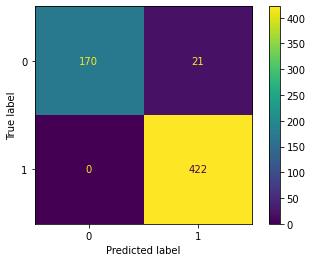

In [46]:
cm = confusion_matrix(y_test, y_pred, labels = model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
disp.plot()
plt.show()

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [48]:
data = pd.read_csv('emails_V2.csv')
data

,text,spam
0,Subject: naturally irresistible your corporate...,1.0
1,Subject: the stock trading gunslinger fanny i...,1.0
2,Subject: unbelievable new homes made easy im ...,1.0
3,Subject: 4 color printing special request add...,1.0
4,"Subject: do not have money , get software cds ...",1.0
...,...,...
5721,NaN,NaN
5722,NaN,NaN
5723,NaN,NaN
5724,NaN,NaN


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5726 entries, 0 to 5725
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    2043 non-null   object 
 1   spam    2043 non-null   float64
dtypes: float64(1), object(1)
memory usage: 89.6+ KB


In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.3, random_state = 42)

In [ ]:
                  #Applying SVM algorithms

                                                Methods
SVM can be a supervised machine learning Algorithms that can be used for both classification and Regression. In any case, it is mostly used in classification matters. As part of the SVM computation, we plot each data item as a point in an n-dimensional space where n can be the number of highlights you have, with the valuation of each one being the valuation of a particular arrangement. At this point, we perform the classification by finding the hyper-plane that separates the two classes exceptionally well.


In [55]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

                                                  Results
Secondly we define the model then fit the train data through SVM. This phase is called training your model. Once the training phase is complete, we are able to use the testing part and predict what will happen. After Running the code, we got 0.9853181076672104 Score


In [56]:
print(classifier.score(x_test,y_test))

0.9853181076672104


In [57]:
# To read the csv files in arrays and dataframes.
import numpy as np 
import pandas as pd 

In [62]:

data = pd.read_csv("emails_V2.csv", encoding = "latin-1")
# # encoding='latin-1' is used to download all special characters and everything in python. If there is no encoding on the data, it gives an error. Let's check the first five values.
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1.0
1,Subject: the stock trading gunslinger fanny i...,1.0
2,Subject: unbelievable new homes made easy im ...,1.0
3,Subject: 4 color printing special request add...,1.0
4,"Subject: do not have money , get software cds ...",1.0


In [63]:
data.isnull().sum()

text    3683
spam    3683
dtype: int64

In [66]:

data.rename(columns= { 'v1' : 'class' , 'v2' : 'message'}, inplace= True)
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1.0
1,Subject: the stock trading gunslinger fanny i...,1.0
2,Subject: unbelievable new homes made easy im ...,1.0
3,Subject: 4 color printing special request add...,1.0
4,"Subject: do not have money , get software cds ...",1.0


In [ ]:
                              #Navie Bayes Algorthms


                                                  Methods
Using Bayes' Run the show, we need to find out how likely an email is spam because it contains certain words. We do this by finding the probability that each word in an email is spam, and then duplicating those probabilities together to force a bulk spam metric to be used in the classification.


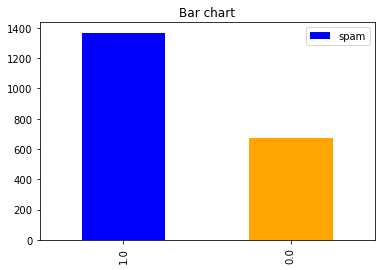

In [68]:
import matplotlib.pyplot as plt
count =pd.value_counts(data["spam"], sort= True)
count.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.legend(loc='best')
plt.show()

                                                    Results
finally we define the model then fit the train data through Bayes'. This phase is called training your model. Once the training phase is complete, we are able to use the testing part and predict what will happen. After Running the code, we got



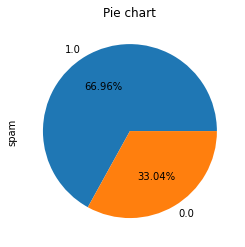

In [70]:
count.plot(kind = 'pie',autopct='%1.2f%%') # 1.2 is the decimal points for 2 places
plt.title('Pie chart')
plt.show()

In [71]:
data.groupby('spam').describe()

text                                                               
     count unique                                                top freq
spam                                                                     
0.0    675    675  Subject: hello guys ,  i ' m " bugging you " f...    1
1.0   1368   1368  Subject: naturally irresistible your corporate...    1

                              CONCLUSIONS
As we have seen, we used the information already collected to prepare the show and assumed a category for modern upcoming emails. This demonstrates the importance of labeling information in the right way. One flop can make your machine dumb like in your gmail or any other email account once you get emails and you think it might be spam but you choose to ignore it, it might be another time once you see that email, you should report it as spam. This preparation can offer help to a bunch of other individuals who receive the same kind of e-mail but don't know what spam is. Now and then an off-base spam tag can so move a real email to the organizer's spam. We’ve as it were scratched the surface of what we are able achieve with machine learning for our e-mail spam locator. We are able moreover include adjustments like computerizing the CSV record. With the number of spam emails sent every day and the amount of money individuals lose to these spam tricks everyday, spam filtering is becoming a basic requirement for all email companies. This article explored the overall approach to spam scanning using advanced machine learning advances. Additionally, we concluded one conceivable way of performing our spam classifier using one of the most famous computations, Logisticregression. In order to test the accuracy of our appearance, an accuracy score metric is used. This metric compares expected arrival to actual arrival. After running the code, we got 98% accuracy. In the expansion, we drew a warm diagram to stimulate thought about how accurate our expected values are compared to the actual values.
